In [14]:
import pandas as pd
import numpy as np
import os, sys

In [17]:
descDwLink = 'https://dl.dropboxusercontent.com/u/45463862/Road-Accident-Safety-Data-Guide-1979-2004.xls'
descDict = pd.read_excel(descDwLink, sheetname=None)

In [4]:
def queryFiles(pd, file, filter_=None, columns=None):
    dfs = list()
    if os.path.exists(file):
        print('Parsing file: {}'.format(file))
        iter_csv = pd.read_csv(file, sep=',', compression='gzip', iterator=True, chunksize=100000)
        if filter_ == None:
            if columns == None:
                df = pd.concat([chunk for chunk in iter_csv])
            else:
                df = pd.concat([chunk[columns] for chunk in iter_csv])
        else:
            if columns == None:
                df = pd.concat([chunk[filter_(chunk)] for chunk in iter_csv])
            else:
                df = pd.concat([chunk[filter_(chunk)][columns] for chunk in iter_csv])
        dfs.append(df)
    else:
        print('Warning: file {} doesn\'t exist!'.format(file))
    dfAll = pd.concat(dfs)
    return dfAll

In [9]:
inputFile = '/home/martin/Downloads/Vehicles0514.csv.tar.gz'
cols = ['Vehicles0514.csv',
'Vehicle_Reference',
'Vehicle_Type',
'Was_Vehicle_Left_Hand_Drive?',
'Sex_of_Driver',
'Age_of_Driver',
'Age_Band_of_Driver',
'Engine_Capacity_(CC)',
'Propulsion_Code',
'Age_of_Vehicle']

In [10]:
df = queryFiles(pd, inputFile, None, cols)

Parsing file: /home/martin/Downloads/Vehicles0514.csv.tar.gz


/home/martin/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3006: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004425 entries, 0 to 4424
Data columns (total 10 columns):
Vehicles0514.csv                object
Vehicle_Reference               int64
Vehicle_Type                    int64
Was_Vehicle_Left_Hand_Drive?    int64
Sex_of_Driver                   int64
Age_of_Driver                   int64
Age_Band_of_Driver              int64
Engine_Capacity_(CC)            int64
Propulsion_Code                 int64
Age_of_Vehicle                  int64
dtypes: int64(9), object(1)
memory usage: 252.1+ MB


In [12]:
df.head()

,Vehicles0514.csv,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle
0,200501BS00001,1,9,1,2,74,10,-1,-1,-1
1,200501BS00002,1,11,1,1,42,7,8268,2,3
2,200501BS00003,1,11,1,1,35,6,8300,2,5
3,200501BS00003,2,9,1,1,62,9,1762,1,6
4,200501BS00004,1,9,1,2,49,8,1769,1,4


In [16]:
df.replace(-1, np.nan, inplace=True)

In [18]:
for k in descDict.keys():
    print(k)

Local Authority (District)
Car Passenger
Casualty Severity
Introduction
Age Band
Hit Object in Carriageway
Casualty Class
Junction Detail
1st Road Class
1st Point of Impact
Was Vehicle Left Hand Drive
Special Conditions at Site
IMD Decile
Local Authority (Highway)
Carriageway Hazards
Ped Movement
Police Force
Home Area Type
Weather
Accident Severity
Casualty Type
Vehicle Manoeuvre
Ped Cross - Human
Export Variables
Urban Rural
Junction Control
Road Surface
Vehicle Type
Sex of Casualty
Ped Location
Vehicle Propulsion Code
Vehicle Location
Ped Road Maintenance Worker
Ped Cross - Physical
Hit Object Off Carriageway
Road Type
Light Conditions
Sex of Driver
Day of Week
Veh Leaving Carriageway
Junction Location
Skidding and Overturning
2nd Road Class
Towing and Articulation
Bus Passenger
Journey Purpose
Police Officer Attend


In [19]:
descDict['Sex of Driver'].set_index('code')['label']

code
 1                            Male
 2                          Female
 3                       Not known
-1    Data missing or out of range
Name: label, dtype: object

In [20]:
df['Sex_of_Driver'] = df.Sex_of_Driver.map(descDict['Sex of Driver'].set_index('code')['label'])

In [21]:
df.Sex_of_Driver.value_counts()

Male         1978150
Female        852519
Not known     173723
Name: Sex_of_Driver, dtype: int64

In [28]:
df['Year'] = df['Vehicles0514.csv'].apply(lambda x: str(x)[:4])

In [29]:
df['Year'] = pd.to_datetime(df.Year, format='%Y')

In [30]:
df.Year.head()

0   2005-01-01
1   2005-01-01
2   2005-01-01
3   2005-01-01
4   2005-01-01
Name: Year, dtype: datetime64[ns]

In [31]:
%matplotlib inline

In [38]:
df.groupby([df['Year'].map(lambda x: x.year), df['Sex_of_Driver']]).size().unstack(0)

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Sex_of_Driver,,,,,,,,,,
Female,100512,97022,93469,88731,86244,81033,79545,77139,72347,76477
Male,244878,231473,222995,205412,195642,183981,179953,173166,164983,175667
Not known,20815,19562,18502,17461,16801,16387,16657,15572,15583,16383


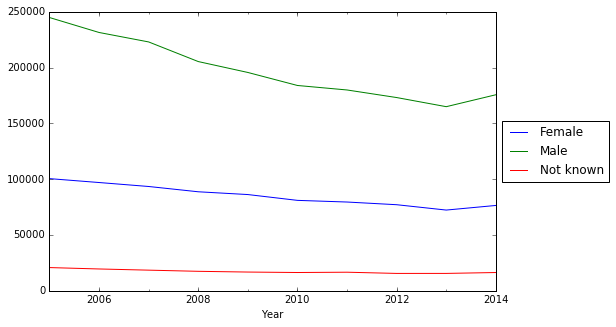

In [50]:
df.groupby(['Year', 'Sex_of_Driver']).size().unstack(1).plot(figsize=(8,5)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

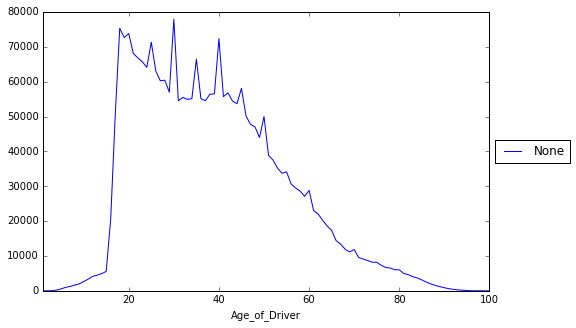

In [53]:
df.groupby(['Age_of_Driver']).size().plot(figsize=(8,5)).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [54]:
df.columns

Index(['Vehicles0514.csv', 'Vehicle_Reference', 'Vehicle_Type',
       'Was_Vehicle_Left_Hand_Drive?', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Year'],
      dtype='object')

In [55]:
df['Age_Band_of_Driver'] = df.Age_Band_of_Driver.map(descDict['Age Band'].set_index('code')['label'])

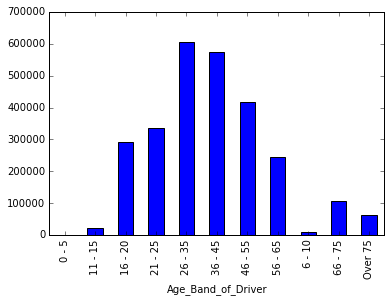

In [63]:
df.groupby(['Age_Band_of_Driver']).size().plot.bar()